# sklearn pipepline & 기타 등등

In [1]:
# 1주차 OneHotEncoding에서 쓴 똑같은 데이터셋 사용
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3
# data import

# import dependencies
import pandas as pd
import numpy as np
import sklearn
import matplotlib as matlib
import matplotlib.pyplot as plt

# import dataset
# file_path 지정해주세요!
file_path = "/Users/ieunpyo/Downloads/AB_NYC_2019.csv"
bnb = pd.read_csv(file_path)

In [2]:
bnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa1b0dc390>,
      dtype=object)

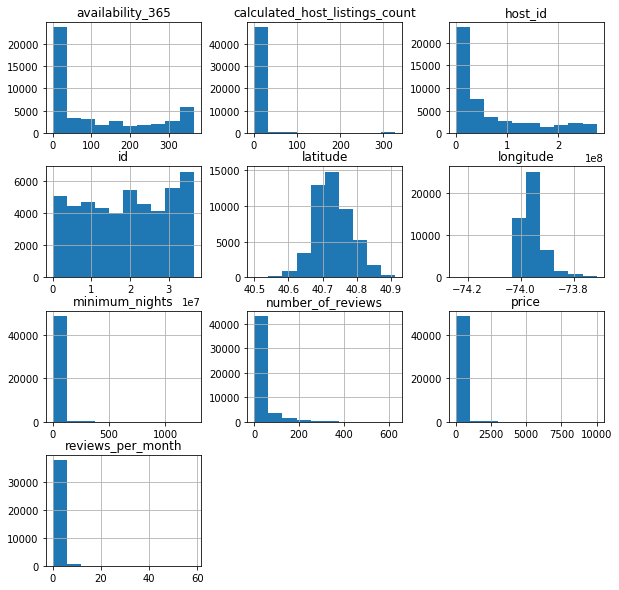

In [3]:
bnb.hist(figsize=[10,10])

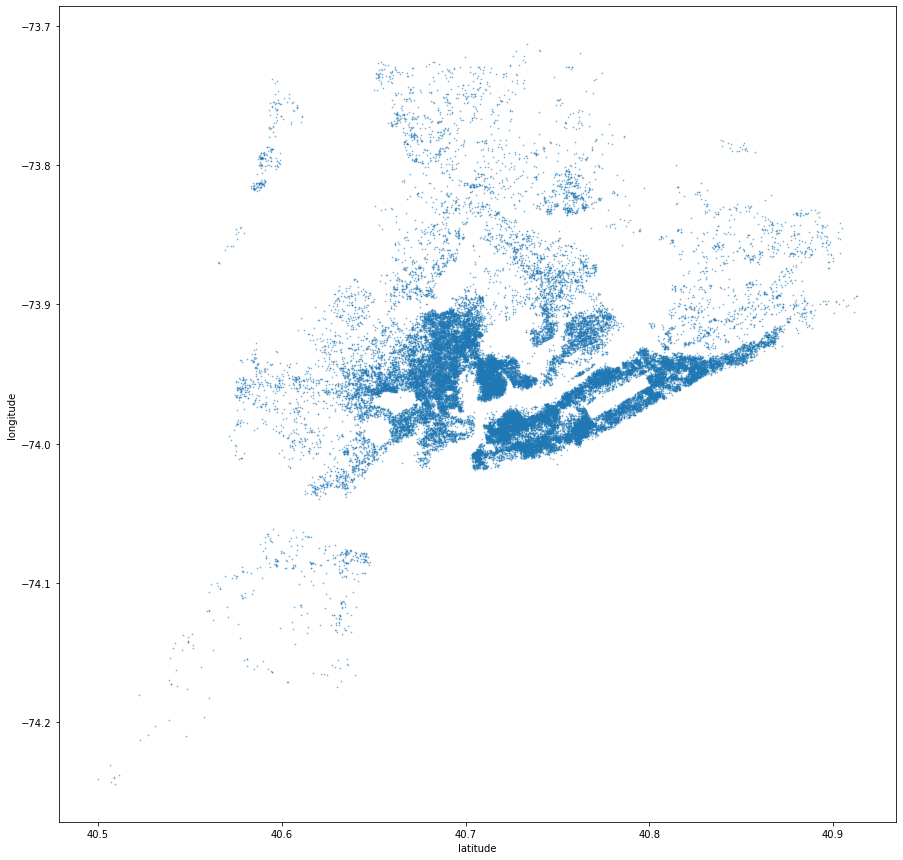

In [5]:
# 심심해서 찍어보았습니다. 예뻐서
bnb.plot.scatter(x='latitude',y='longitude',figsize=[15,15],s=0.5,alpha=0.5)

### Duck Typing

설명1) 컴퓨터 프로그래밍 분야에서 덕 타이핑(duck typing)은 동적 타이핑의 한 종류로, 객체의 변수 및 메소드의 집합이 객체의 타입을 결정하는 것을 말한다. 클래스 상속이나 인터페이스 구현으로 타입을 구분하는 대신, 덕 타이핑은 객체가 어떤 타입에 걸맞은 변수와 메소드를 지니면 객체를 해당 타입에 속하는 것으로 간주한다. “덕 타이핑”이라는 용어는 다음과 같이 표현될 수 있는 덕 테스트에서 유래했다.
* 만약 어떤 새가 오리처럼 걷고, 헤엄치고, 꽥꽥거리는 소리를 낸다면 나는 그 새를 오리라고 부를 것이다.

덕 타이핑에서는, 객체의 타입보다 객체가 사용되는 양상이 더 중요하다. 예를 들면, 덕 타이핑이 없는 프로그래밍 언어로는 오리 타입의 객체를 인자로 받아 객체의 걷기 메소드와 꽥꽥거리기 메소드를 차례로 호출하는 함수를 만들 수 있다. 반면에, 같은 함수를 덕 타이핑이 지원되는 언어에서는 인자로 받는 객체의 타입을 검사하지 않도록 만들 수 있다. 걷기 메소드나 꽥꽥거리기 메소드를 호출 할 시점에서 객체에 두 메소드가 없다면 런타임 에러가 발생하고, 두 메소드가 제대로 구현되어 있다면 함수는 정상적으로 작동한다. 여기에는 인자로 받은 객체가 걷기 메소드와 꽥꽥거리기 메소드를 갖고 있다면 객체를 오리 타입으로 간주하겠다는 암시가 깔려있다. 바로 이 점이 앞에서 인용한 덕 테스트의 사상과 일치하기 때문에 덕 타이핑이라는 이름이 붙었다.

설명 2) 객체의 타입을 다른 타입 객체와의 명시적인 관계를 비교하는 것이 아니라, 그 객체의 메서드나 속성들을 비교함으로써 판별하는 파이썬적인 프로그래밍 스타일이다. (“오리처럼 보이고, 오리처럼 운다면 오리임에 틀림없다.”) 특정 타입 대신 인터페이스를 강조함으로써, 잘 디자인된 코드는 다형적 대체를 허용함으로써 유연성을 향상시킬 수 있다. 덕 타이핑을 이용하면 type()이나 isinstance()를 이용한 테스트를 하지 않는다. 대신, 대개 hasattr() 테스트를 이용하거나, 혹은 EAFP (Easier to ask forgiveness than permission; 하고 나서 용서를 비는 것이 하기 전에 허락을 구하는 것보다 쉽다) 프로그래밍 기법을 이용한다.

https://ko.wikipedia.org/wiki/덕_타이핑

# FunctionTransformer

파이프라인으로 본격적으로 들어가기 전에 FunctionTransformer에 대해서 살펴보자. 

### class sklearn.preprocessing.FunctionTransformer(func=None, inverse_func=None, validate=None, accept_sparse=False, pass_y=’deprecated’, check_inverse=True, kw_args=None, inv_kw_args=None)

scikitlearn에 설명은 아래와 같음. 대충 파이프라인에 내가 만든 함수 혹은 scikit-learn 외의 함수들을 넣을 때 사용한다 정도로 생각하면 될듯.

함수에 fit method 및 transform method를 사용할 수 있게 됨 => pipeline에 들어갈 수 있음

Constructs a transformer from an arbitrary callable.
A FunctionTransformer forwards its X (and optionally y) arguments to a user-defined function or function object and returns the result of this function. This is useful for stateless transformations such as taking the log of frequencies, doing custom scaling, etc.
Note: If a lambda is used as the function, then the resulting transformer will not be pickleable.
New in version 0.17.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

In [6]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
bnb.minimum_nights.value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

### Minimum_nights에 따라 범주화를 해봄.

In [8]:
# minimum_nights에 따라 범주화
a = np.repeat(0,len(bnb))
for i in range(len(bnb)) : 
    ith = bnb.minimum_nights[i]
    if ith == 1 :
        a[i] = 1
    elif ith == 2 :
        a[i] = 2
    elif ith == 3 :
        a[i] = 3 
    elif ith <= 30 :
        a[i] = 4 
    else : 
        a[i] =5
        
a

array([1, 1, 3, ..., 4, 1, 4])

In [9]:
bnb.number_of_reviews.value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

### number_of_reviews에 따라 범주화해봄

In [10]:
b = np.repeat(0,len(bnb))
for i in range(len(bnb)) : 
    ith = bnb.number_of_reviews[i]
    if ith == 0 :
        b[i] = 0
    elif ith <= 5 :
        b[i] = 1
    elif ith <= 10 :
        b[i] = 2 
    elif ith <= 100 :
        b[i] = 3 
    else : 
        b[i] =4
        
b

array([2, 3, 0, ..., 0, 0, 0])

In [11]:
pd.Series(b).value_counts()

3    15577
1    14841
0    10052
2     5430
4     2995
dtype: int64

## 앞서 한 두 개의 과정을 하나로 합친 함수인 categorizer를 만듬

In [43]:
def categorizer(X,min_nights=True,num_of_reviews=True) :
    min_nights_ix = list(X.columns).index('minimum_nights')
    num_of_reviews_ix = list(X.columns).index('number_of_reviews')
    X = np.array(X)
    if min_nights==True :
        a = np.repeat(0,len(X))
        for i in range(len(X)) : 
            ith = X[i,min_nights_ix]
            if ith == 1 :
                a[i] = 1
            elif ith == 2 :
                a[i] = 2
            elif ith == 3 :
                a[i] = 3 
            elif ith <= 30 :
                a[i] = 4 
            else : 
                a[i] =5
        X = np.c_[X,a]
    if num_of_reviews==True :
        b = np.repeat(0,len(X))
        for i in range(len(X)) : 
            ith = X[i,num_of_reviews_ix]
            if ith == 0 :
                b[i] = 0
            elif ith <= 5 :
                b[i] = 1
            elif ith <= 10 :
                b[i] = 2 
            elif ith <= 100 :
                b[i] = 3 
            else : 
                b[i] =4
        X = np.c_[X,b]
    return(X)
        
# 끝에 두 개의 특성이 추가되고 잘 작동함을 확인할 수 있다!
categorizer(bnb)

array([[2539, 'Clean & quiet apt home by the park', 2787, ..., 365, 1, 2],
       [2595, 'Skylit Midtown Castle', 2845, ..., 355, 1, 3],
       [3647, 'THE VILLAGE OF HARLEM....NEW YORK !', 4632, ..., 365, 3,
        0],
       ...,
       [36485431, 'Sunny Studio at Historical Neighborhood', 23492952,
        ..., 27, 4, 0],
       [36485609, '43rd St. Time Square-cozy single bed', 30985759, ...,
        2, 1, 0],
       [36487245, "Trendy duplex in the very heart of Hell's Kitchen",
        68119814, ..., 23, 4, 0]], dtype=object)

### 이제 Pipeline & FunctionTransformer를 이용할 차례

### pipeline

* Pipeline of transforms with a final estimator.Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.(<-FunctionTransformer를 사용해야하는 이유) The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

* The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.(<-Pipeline의 장점) For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or None.

#### class sklearn.pipeline.Pipeline(steps, memory=None, verbose=False)

#### class sklearn.preprocessing.FunctionTransformer(func=None, inverse_func=None, validate=None, accept_sparse=False, pass_y=’deprecated’, check_inverse=True, kw_args=None, inv_kw_args=None)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [25]:
numerics = ['price','number_of_reviews','reviews_per_month','availability_365']
categoricals = ['neighbourhood_group','room_type']
addfeature = ['minimum_nights', 'number_of_reviews']

In [26]:
numeric_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [27]:
bnb_nums = bnb[numerics]
bnb_nums_tr = numeric_pipeline.fit_transform(bnb_nums)
bnb_nums_tr

array([[-0.01549307, -0.32041358, -0.6765512 ,  1.91625031],
       [ 0.30097355,  0.48766493, -0.56477128,  1.84027456],
       [-0.01132904, -0.52243321, -0.34121145,  1.91625031],
       ...,
       [-0.15707024, -0.52243321, -0.34121145, -0.65173008],
       [-0.4069123 , -0.52243321, -0.34121145, -0.84166946],
       [-0.2611711 , -0.52243321, -0.34121145, -0.68212038]])

In [28]:
bnb_cat = bnb[categoricals]
bnb_cat_tr = OneHotEncoder().fit_transform(bnb_cat) # () 유의


In [29]:
bnb_cat_tr.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [45]:
bnb_add = bnb[addfeature]

add_pipeline = Pipeline([
        ('categorizer', FunctionTransformer(categorizer, validate=False)),
    ])

bnb_add_tr = add_pipeline.fit_transform(bnb_add)
bnb_add_tr

array([[ 1,  9,  1,  2],
       [ 1, 45,  1,  3],
       [ 3,  0,  3,  0],
       ...,
       [10,  0,  4,  0],
       [ 1,  0,  1,  0],
       [ 7,  0,  4,  0]])

### 이제 ColumnTransformer 사용해서 FullPipeline을 만들면


### sklearn.composes.ColumnTransformer

#### class sklearn.compose.ColumnTransformer(transformers, remainder=’drop’, sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False)

* transformers : list of tuples 

List of (name, transformer, column(s)) tuples specifying the transformer objects to be applied to subsets of the data.

name 은 그냥 이름! , transformer는 fit, transform method를 지원해야 하고, column(s) 는 해당 transformer를 사용할 열의 인덱스나 이름을 적어주면 된다.


* remainder : {‘drop’, ‘passthrough’} or estimator, default ‘drop’


In [46]:
from sklearn.compose import ColumnTransformer

numerics = ['price','number_of_reviews','reviews_per_month','availability_365']
categoricals = ['neighbourhood_group','room_type']
addfeature = ['minimum_nights', 'number_of_reviews']

full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, numerics),
        ("cat", OneHotEncoder(), categoricals),
        ("add", add_pipeline,addfeature)
    ])

bnb_prepared = full_pipeline.fit_transform(bnb)

In [48]:
bnb_prepared[0]

array([-0.01549307, -0.32041358, -0.6765512 ,  1.91625031,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  9.        ,  1.        ,
        2.        ])